In [20]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

my_data = load_iris()
my_data2 = load_iris()
my_data3 = load_iris()

my_data = pd.DataFrame(my_data.data,columns=[my_data.feature_names])
my_data2 = pd.DataFrame(my_data2.data,columns=[my_data2.feature_names])
my_data3 = pd.DataFrame(my_data3.data,columns=[my_data3.feature_names])

my_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


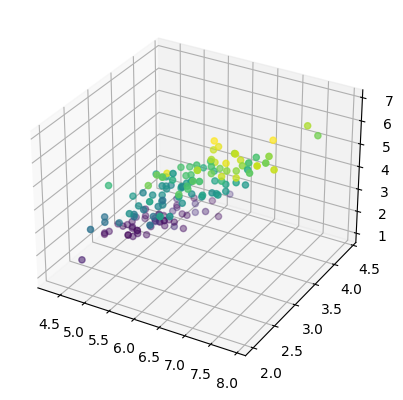

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig2 = fig.add_subplot(projection='3d')
fig2.scatter(my_data['sepal length (cm)'],my_data['sepal width (cm)'],my_data['petal length (cm)'],c=my_data['petal width (cm)'])
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
iris = load_iris()
my_data = scale.fit_transform(my_data)
my_data[0:5]

my_data_cov = np.cov(my_data.T)
my_data_cov

eig_vals, eig_vecs  = np.linalg.eig(my_data_cov)

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda my_data: my_data[0],reverse=True)
for i in eig_pairs:
     print(i[0])
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print ("Variance captured by each component is \n",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)
print("All Eigen Values along with Eigen Vectors")
print(eig_pairs)
print(40 * '-')
out = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

new_matrix1 = my_data.dot(out)
print(new_matrix1)

2.9380850501999927
0.9201649041624892
0.1477418210449476
0.020853862176462064
Variance captured by each component is 
 [72.96244541329983, 22.850761786701817, 3.668921889282866, 0.5178709107154746]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 72.96244541  95.8132072   99.48212909 100.        ]
All Eigen Values along with Eigen Vectors
[(2.9380850501999927, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (0.9201649041624892, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])), (0.1477418210449476, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])), (0.020853862176462064, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]
----------------------------------------
[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]
 [-2.07563095 -1.48917752]
 [-2.44402884 -0.0476442 ]
 [-2.23284716 -0.22314807]
 [-2.33464048 

In [23]:
from numpy.linalg import eigh, norm

eigenvalue, eigenvector = eigh(my_data2.T@my_data2)
print('Eigenvalue = ',eigenvalue)
print(eigenvector)
u0 = my_data2@eigenvector[:,0]/norm(my_data2@eigenvector[:,0])
u1 = my_data2@eigenvector[:,1]/norm(my_data2@eigenvector[:,1])
u2 = my_data2@eigenvector[:,2]/norm(my_data2@eigenvector[:,2])
u3 = my_data2@eigenvector[:,3]/norm(my_data2@eigenvector[:,3])
U = np.array([u0,u1,u2,u3]).T

D = np.round(U.T@my_data2@eigenvector, decimals=7)
A = U@D@eigenvector.T
V = eigenvector[:2, :]

new_matrix2 = np.dot(my_data2,V.T)
new_matrix2

Eigenvalue =  [3.55257020e+00 1.19780429e+01 3.15454317e+02 9.20830507e+03]
[[ 0.32081425 -0.50215472 -0.2841749  -0.75110816]
 [-0.31725607  0.67524332 -0.5467445  -0.38008617]
 [-0.48074507  0.05916621  0.70866455 -0.51300886]
 [ 0.75187165  0.53701625  0.34367081 -0.16790754]]


array([[-6.69455331e-01, -9.61138548e-02],
       [-4.82540820e-01, -3.70284301e-01],
       [-6.18717125e-01, -1.17109974e-01],
       [-6.57418059e-01, -2.62257600e-01],
       [-7.51752229e-01,  3.13608377e-03],
       [-1.00954705e+00, -1.61233932e-01],
       [-8.54757802e-01, -4.30187709e-02],
       [-6.79738774e-01, -1.86587030e-01],
       [-5.92732475e-01, -2.79180600e-01],
       [-4.86062966e-01, -3.19425802e-01],
       [-7.02059489e-01, -1.10916461e-01],
       [-7.72319115e-01, -1.77810267e-01],
       [-4.39511429e-01, -3.00550078e-01],
       [-5.14666086e-01,  2.21013059e-02],
       [-6.39127734e-01,  1.28777459e-01],
       [-1.10754515e+00,  1.90559809e-01],
       [-8.95877086e-01,  5.74638688e-02],
       [-7.44566147e-01, -1.34122472e-01],
       [-7.87976482e-01, -2.85926466e-01],
       [-9.23630055e-01,  1.37760737e-02],
       [-6.08248053e-01, -4.22838357e-01],
       [-9.48525398e-01, -9.17568755e-02],
       [-7.66407970e-01,  3.48736311e-01],
       [-8.

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(my_data3)
new_matrix3 = pca.transform(my_data3)
new_matrix3 = pd.DataFrame(new_matrix3)
new_matrix3

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


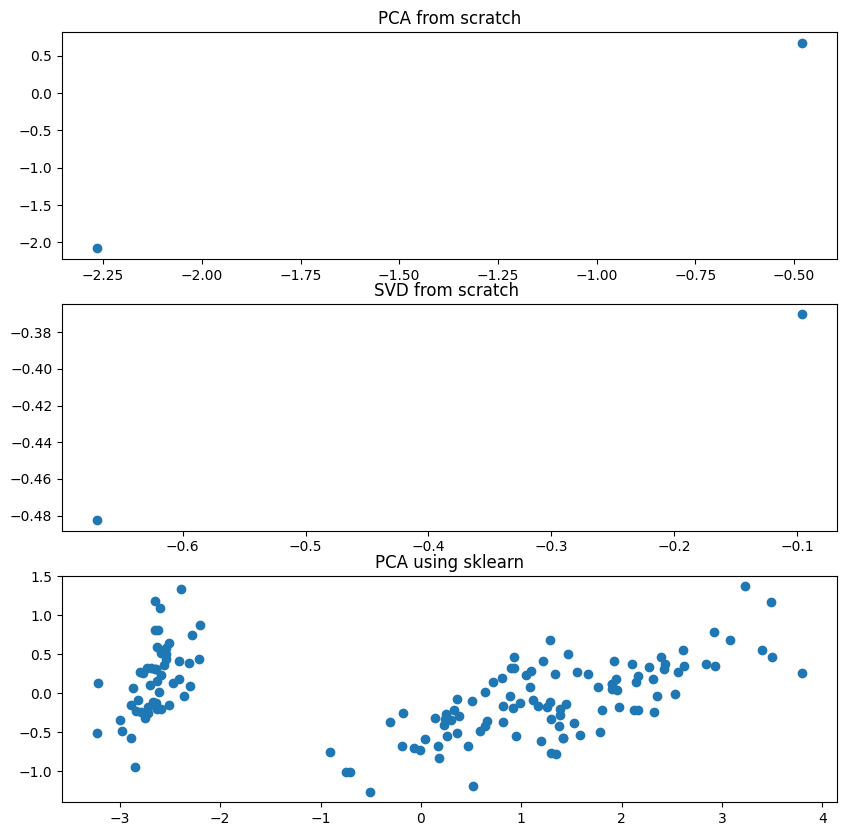

In [25]:
import matplotlib.pyplot as plt
fig, (ax1, ax2,ax3) = plt.subplots(3,figsize=(10,10))
ax1.scatter(new_matrix1[0],new_matrix1[1])
ax1.set_title('PCA from scratch')
ax2.scatter(new_matrix2[0],new_matrix2[1])
ax2.set_title('SVD from scratch ')
ax3.scatter(new_matrix3[0],new_matrix3[1])
ax3.set_title('PCA using sklearn')
plt.show()

In [26]:
pca = PCA(n_components=1)
pca.fit(my_data3)
new_matrix3 = pca.transform(my_data3)
new_matrix3 = pd.DataFrame(new_matrix3)
pca.explained_variance_ratio_

array([0.92461872])

[0.92461872 0.05306648 0.01710261]


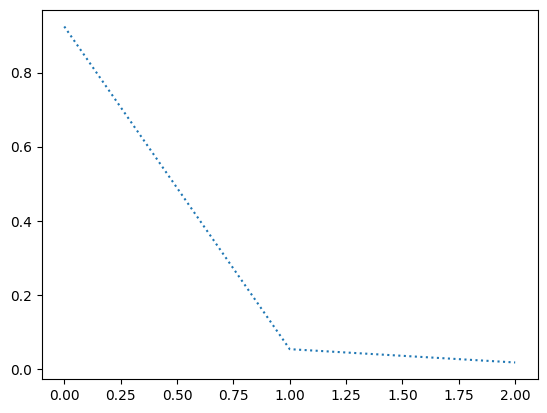

In [27]:
pca = PCA(n_components=3)
pca.fit(my_data3)
new_matrix3 = pca.transform(my_data3)
new_matrix3 = pd.DataFrame(new_matrix3)
img = pca.explained_variance_ratio_
print(img)
plt.plot(img, linestyle = 'dotted')
plt.show()
plt.show()

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
df = load_digits()
df = pd.DataFrame(df.data)
new_df = StandardScaler()
new_df = new_df.fit_transform(df)
vin = PCA(n_components=2)
vin.fit(new_df)
final_df = vin.transform(new_df)
final_df = pd.DataFrame(final_df)
final_df

,0,1
0,1.914214,-0.954507
1,0.588980,0.924635
2,1.302041,-0.317175
3,-3.020772,-0.868777
4,4.528951,-1.093463
...,...,...
1792,0.104329,0.255003
1793,2.423229,-1.429659
1794,1.022594,-0.147922
1795,1.076055,-0.380910


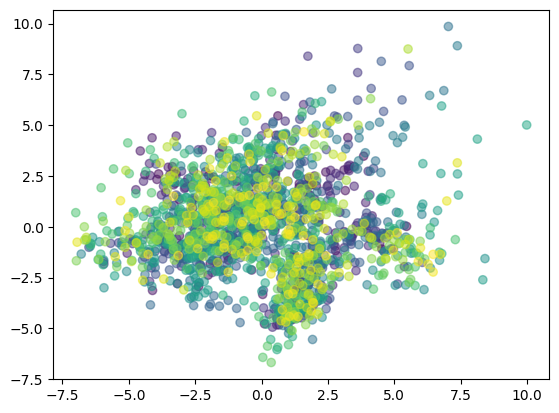

In [29]:
import matplotlib.pyplot as plt
import random
x = final_df[0]
y = final_df[1]
digital_number = [range(1797)]
plt.scatter(x, y, c = digital_number, alpha=0.5)